#Описания столбцов:  
- **id** (Уникальный идентификатор для каждого пациента)  
- **age** (Возраст пациента в годах)  
- **sex** (Мужчина/Женщина)  
- **cp** тип боли в груди ([типичная стенокардия, атипичная стенокардия, неангинальная, бессимптомная])  
- **trestbps** артериальное давление в состоянии покоя (артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)    
- **chol** (сывороточный холестерин в мг/дл)  
- **fbs** (если уровень сахара в крови натощак> 120 мг / дл)  
- **restecg** (результаты электрокардиографии в состоянии покоя)  
Значения: [норма, аномалия stt, гипертрофия лж]
- **thalach**: достигнута максимальная частота сердечных сокращений
- **exang**: стенокардия, вызванная физической нагрузкой (истинная / ложная)   
- **oldpeak**: депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
- **slope** наклон сегмента ST при максимальной нагрузке
- **ca**: количество крупных сосудов (0-3), окрашенных при рентгеноскопии
- **thal**: [нормальный; исправленный дефект; обратимый дефект]
- **num**: предсказанный атрибут

In [ ]:
!jupyter nbconvert --to html /content/HEART_WITH_STACK.ipynb

[NbConvertApp] Converting notebook /content/HEART_WITH_STACK.ipynb to html
[NbConvertApp] Writing 1504026 bytes to /content/HEART_WITH_STACK.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve,auc

In [ ]:
plt.rcParams['figure.figsize'] = (11, 6.5)

In [ ]:
data = pd.read_csv('heart_disease_uci.csv', )
data_with_features = pd.read_csv('heart_disease_uci.csv', )
data_with_age_and_mull = pd.read_csv('heart_disease_uci.csv', )
data_mull = pd.read_csv('heart_disease_uci.csv', )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
num_cols = [
    'age',
    'trestbps',
    'chol',
    'thalch',
    'oldpeak',
    ]

cat_cols = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'thal',
    'ca',

]

target_col = ['num']
feature_cols = num_cols + cat_cols

(array([181.,   0.,   0.,  67.,   0.,   0.,  41.,   0.,   0.,  20.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

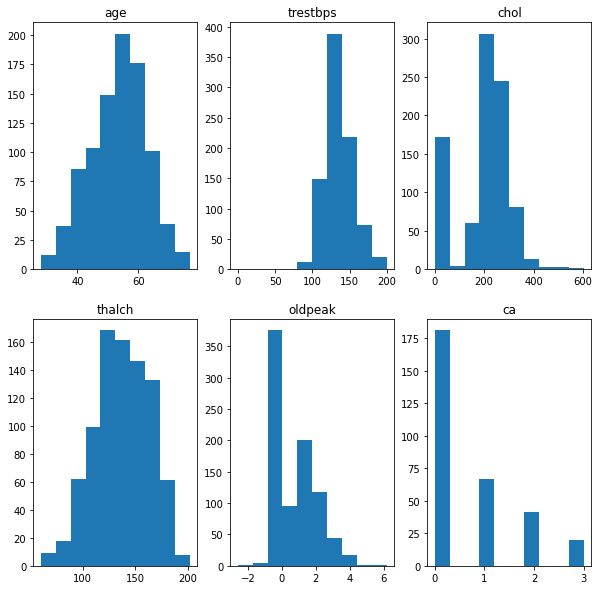

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax = ax.ravel()

for i in range(len(num_cols)):
  ax[i].set_title(num_cols[i])
  ax[i].hist(data[num_cols[i]])
ax[len(num_cols)].set_title('ca')
ax[len(num_cols)].hist(data['ca'])


In [ ]:
data['num'].replace([*range(1,5)], 1, inplace = True)

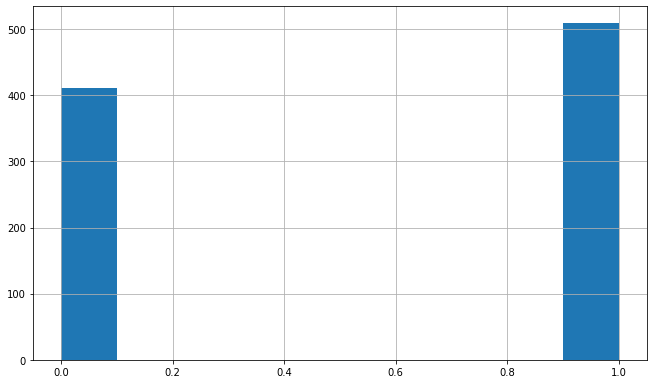

In [ ]:
data.num.hist(grid=True)

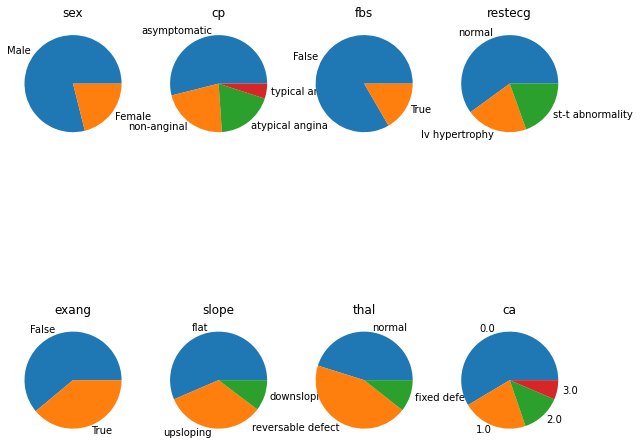

In [ ]:
pie, axes = plt.subplots(2, 4, figsize = (10 , 10))
for ax, col in zip(axes.flatten(), cat_cols):
  ax.set_title(col)
  counts = data[col].value_counts()
  labels = counts.index
  ax.pie(counts, labels=labels)

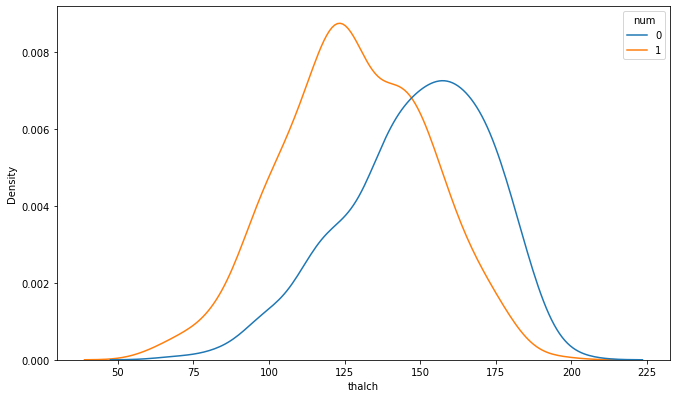

In [ ]:
sns.kdeplot(x='thalch', data=data, hue='num')

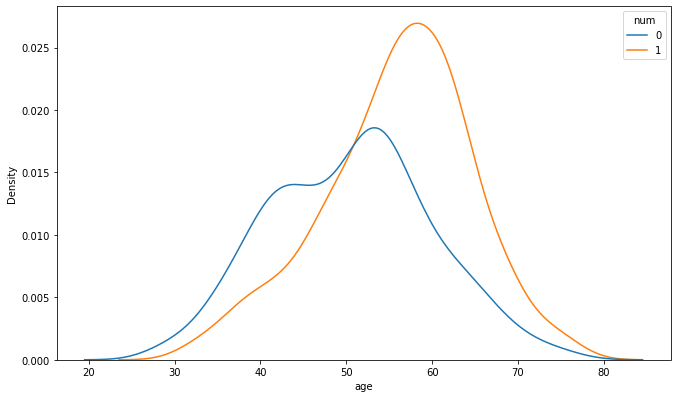

In [ ]:
sns.kdeplot(x='age', data=data, hue='num')

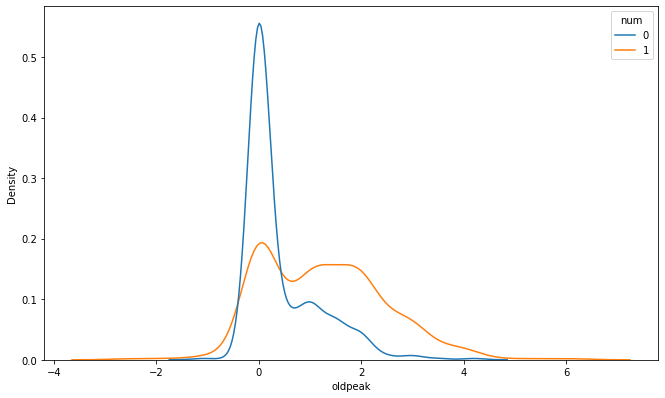

In [ ]:
sns.kdeplot(x='oldpeak', data=data, hue='num')

In [ ]:
def draw_auc(y_test, y_test_predicted):
    """ Функция для отрисовки AUC """
    test_auc = roc_auc_score(y_test, y_test_predicted)

    fig = plt.figure(figsize=(20,10))
    plt.plot([0, 0], [0, 1], color='navy', linestyle='--')
    plt.plot([0, 1], [1, 1], color='navy', linestyle='--')
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label=f'test AUC={test_auc}')
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("grey")
    legend_box.set_edgecolor("blue")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()


In [ ]:
def give_report(y_test, y_test_predicted):
  print(classification_report(y_test, y_test_predicted)) 
  print(confusion_matrix (y_test, y_test_predicted))


In [ ]:
def scaling_and_transform(data, feature_cols=None):


  num_cols = [
      'age',
      'trestbps',
      'chol',
      'thalch',
      'oldpeak',
      ]

  cat_cols = [
      'sex',
      'cp',
      'fbs',
      'restecg',
      'exang',
      'slope',
      'thal',
      'ca',

  ]

  # удаляем пропуски в данных
  if feature_cols:
    cat_cols+=feature_cols
  for column in cat_cols:
    data[column].replace('', np.nan, inplace = True)
    data.dropna(subset=[column], inplace = True)

  for column in num_cols:
    data.dropna(subset=[column], inplace = True)

  # проебразуем таргеты в два класса
  data['num'].replace([*range(1,5)], 1, inplace = True)

  # преобразуем категориальные признаки 
  data = pd.get_dummies(data, columns=cat_cols)

  # Стандартизируем данные
  st = StandardScaler()
  X = st.fit_transform(data.drop(['num', 'id','dataset'], axis=1))
  X_train, X_test, y_train, y_test = train_test_split(X, data['num'], test_size=0.15, random_state=42)

  return ( data, X_train, y_train, X_test, y_test,)

In [ ]:
simple_data = scaling_and_transform(data)
data_feature = scaling_and_transform(data_with_features)
data_age_mull = scaling_and_transform(data_with_age_and_mull)
data_mull = scaling_and_transform(data_mull)

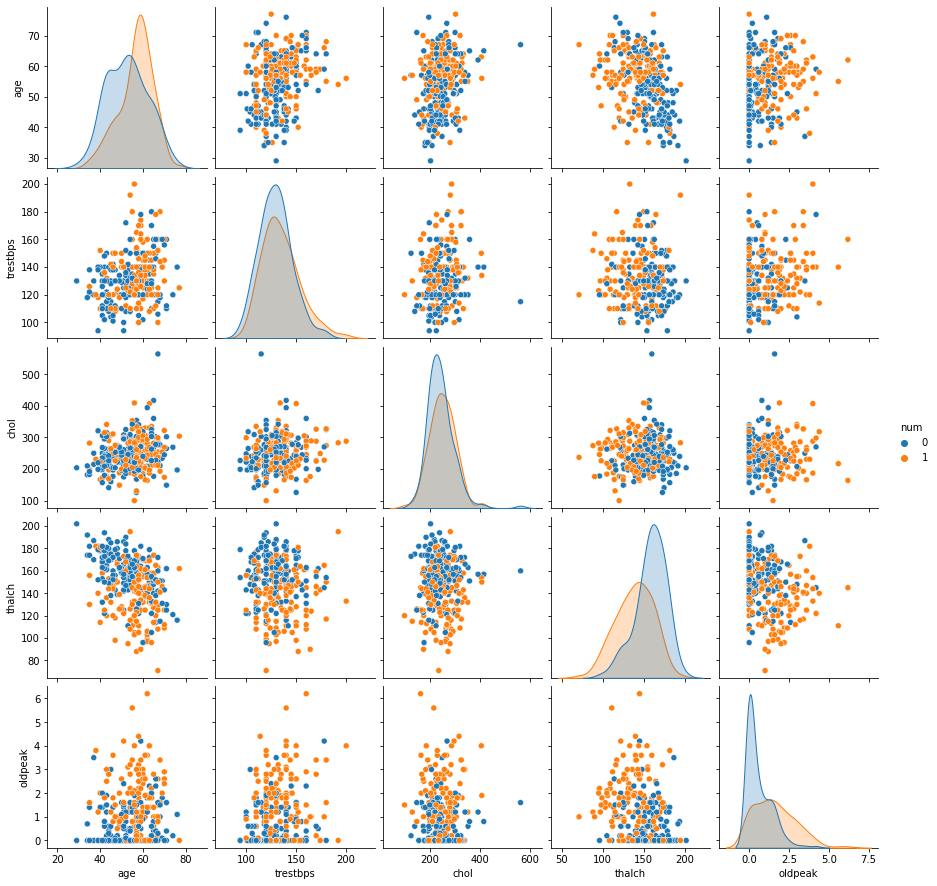

In [ ]:
sns.pairplot(data[num_cols+target_col], hue = 'num')

In [ ]:
data['num'].value_counts()

0    160
1    139
Name: num, dtype: int64

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search_poly = GridSearchCV(svm.SVC(kernel='poly', gamma='auto',probability=True),
                               param_grid = {
                                   'C' : np.arange(1, 10,1),
                                   'degree' : np.arange(1,30),
                                   'coef0' : np.arange(1, 10, 1)
                                   },
                               scoring = 'accuracy',
                               cv = 3,
                               refit=True,
                               verbose=0)
search_poly.fit(simple_data[1], simple_data[2])
poly_predict = search_poly.predict(simple_data[3])
poly_predict_proba = search_poly.predict_proba(simple_data[3])


In [ ]:
give_report(simple_data[4],poly_predict)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.82      0.82      0.82        17

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45

[[25  3]
 [ 3 14]]


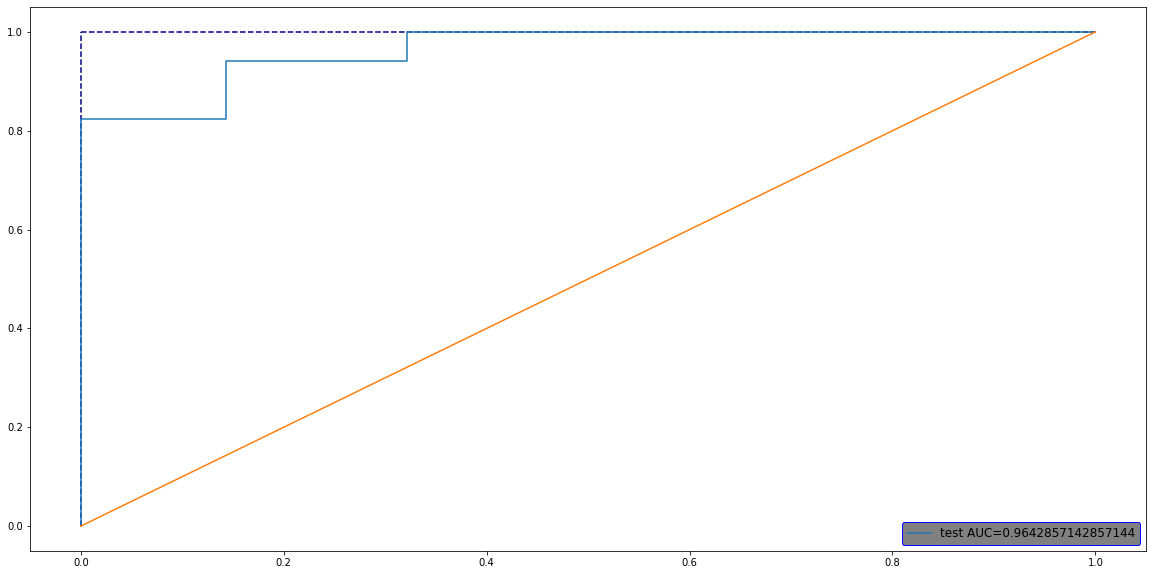

In [ ]:
draw_auc(simple_data[4], poly_predict_proba[:,1])

In [ ]:
search_sigmoid = GridSearchCV(svm.SVC(kernel='rbf',probability=True),
                               param_grid = {
                                   'gamma' : np.arange(0.01, 10, 0.01),
                                   },
                               scoring = 'f1',
                               cv = 5,
                               refit=True,
                               verbose=0)
search_sigmoid.fit(simple_data[1], simple_data[2])
sigmoid_predict = search_sigmoid.predict(simple_data[3])
sigmoid_predict_proba = search_sigmoid.predict_proba(simple_data[3])

In [ ]:
give_report(simple_data[4],sigmoid_predict)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

[[24  4]
 [ 2 15]]


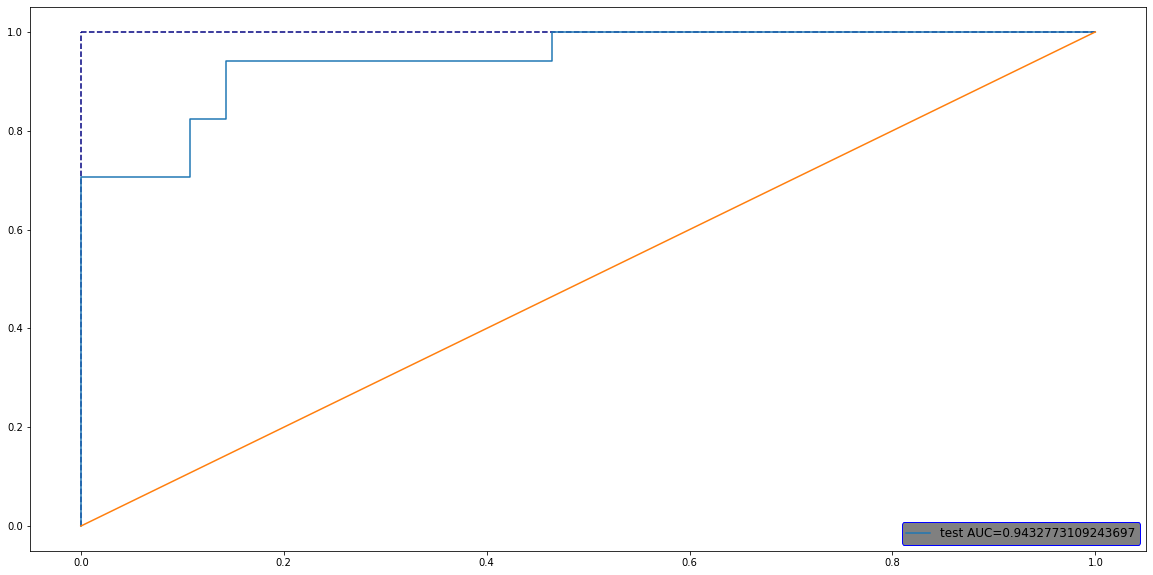

In [ ]:
draw_auc(simple_data[4], sigmoid_predict_proba[:,1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), 
                               [{'n_neighbors': np.arange(2,20)}],
                               cv=5,
                               refit = True,
                               verbose=0)
knn_grid_search.fit(simple_data[1], np.ravel(simple_data[2]))
knn_predict = knn_grid_search.predict(simple_data[3])
knn_predict_proba = knn_grid_search.predict_proba(simple_data[3])


In [ ]:
give_report(simple_data[4],knn_predict)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.78      0.82      0.80        17

    accuracy                           0.84        45
   macro avg       0.83      0.84      0.84        45
weighted avg       0.85      0.84      0.85        45

[[24  4]
 [ 3 14]]


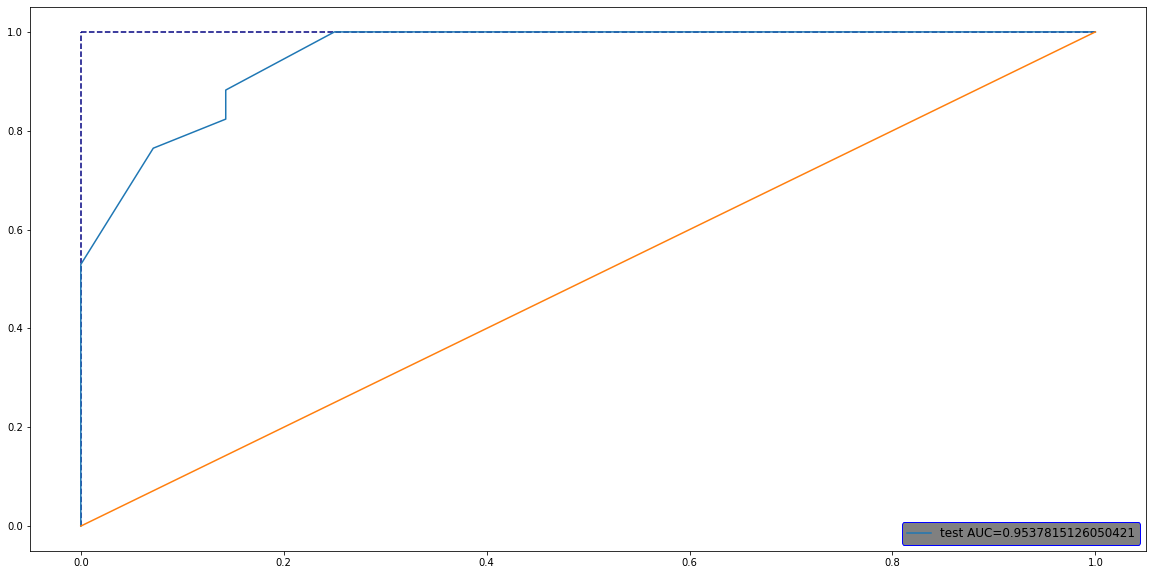

In [ ]:
draw_auc(simple_data[4], knn_predict_proba[:,1])

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf_log = GridSearchCV(LogisticRegression(max_iter=10000, solver = 'saga'), 
                               param_grid = {
                                   'C' : np.arange(0.01, 1, 0.01),
                                   'penalty' : ['l1', 'l2'],
                                   },
                               scoring = 'accuracy',
                               cv = 5,
                               refit=True,
                               verbose=0)
clf_log.fit(simple_data[1], simple_data[2])
log_predict_proba = clf_log.predict_proba(simple_data[3])
log_predict = clf_log.predict(simple_data[3])


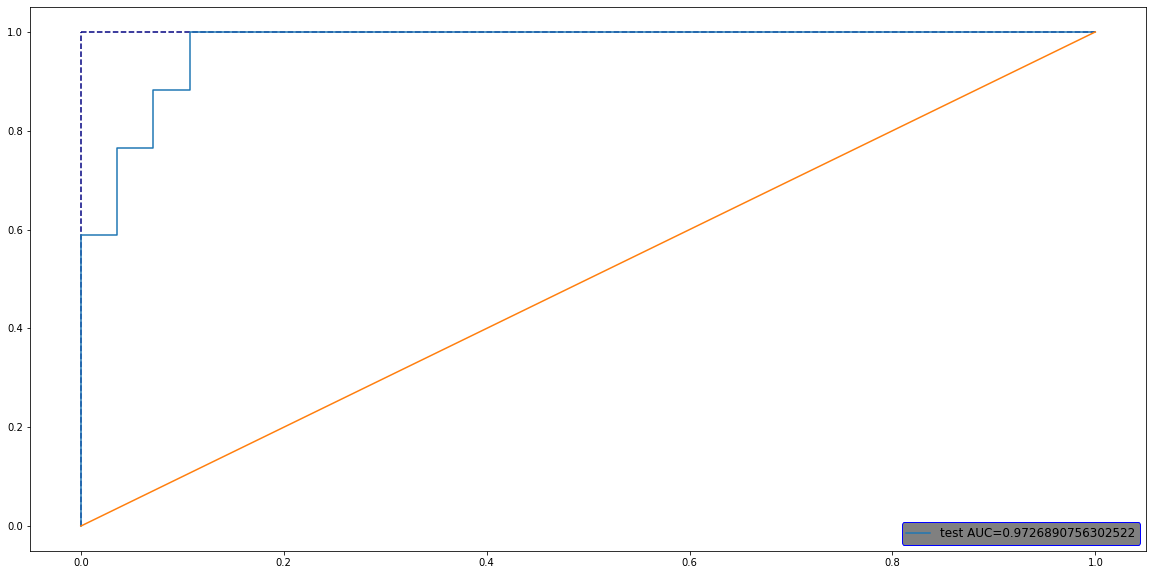

In [ ]:
draw_auc(simple_data[4], log_predict_proba[:,1])

In [ ]:
give_report(simple_data[4],log_predict)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dec_tree_search = GridSearchCV(DecisionTreeClassifier(),
param_grid = { 'criterion':['entropy',],
              'max_depth':np.arange(1,20,1),
              'min_samples_split':np.arange(1,20,1),
              'min_samples_leaf':np.arange(1,20,1)},
              cv=5,
              refit = True,
              verbose=0)
dec_tree_search.fit(simple_data[1], simple_data[2])
dec_tree_predict = dec_tree_search.predict(simple_data[3])
dec_tree_predict_proba = dec_tree_search.predict_proba(simple_data[3])

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1805 fits failed out of a total of 34295.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1805 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; 

In [ ]:
give_report(simple_data[4], dec_tree_predict)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[26  2]
 [ 2 15]]


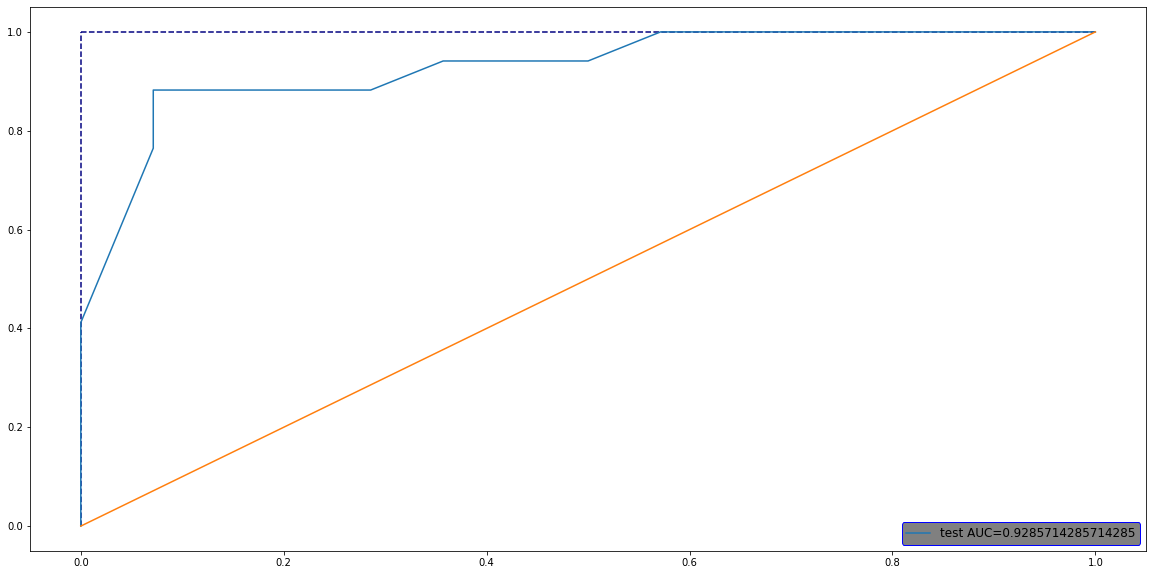

In [ ]:
draw_auc(simple_data[4], dec_tree_predict_proba[:,1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree_search = GridSearchCV(RandomForestClassifier(),
param_grid = { 'n_estimators' : np.arange(3, 300, 3),},
              cv=5,
              verbose=0)
tree_search.fit(simple_data[1], simple_data[2])
tree_predict = tree_search.predict(simple_data[3])
tree_predict_proba = tree_search.predict_proba(simple_data[3])
print(accuracy_score(simple_data[4], tree_predict))


0.8444444444444444


In [ ]:
give_report(simple_data[4], tree_predict)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.78      0.82      0.80        17

    accuracy                           0.84        45
   macro avg       0.83      0.84      0.84        45
weighted avg       0.85      0.84      0.85        45

[[24  4]
 [ 3 14]]


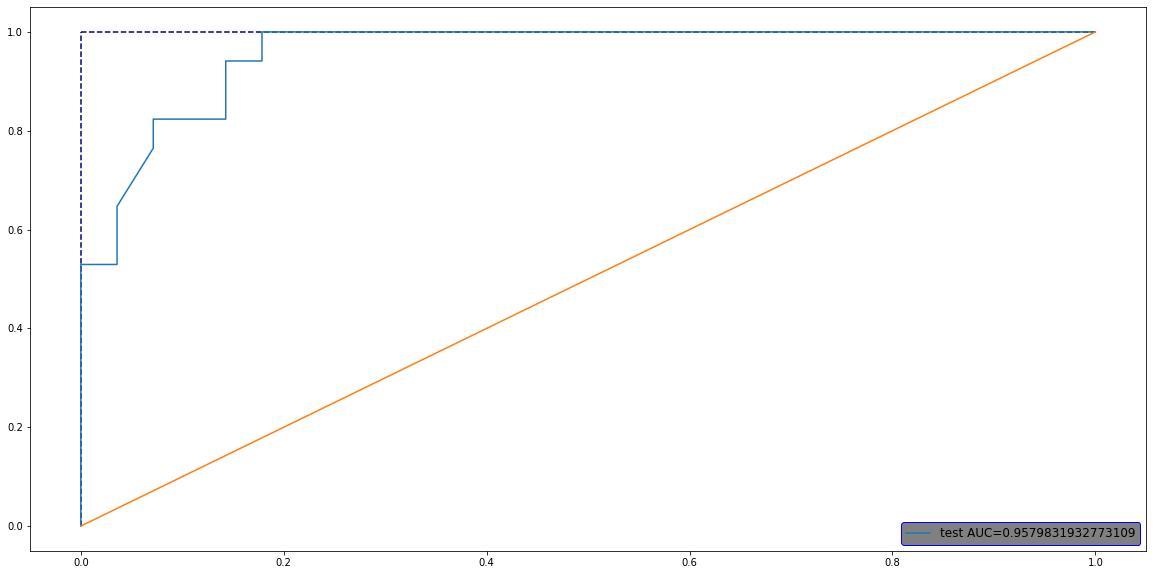

In [ ]:
draw_auc(simple_data[4],tree_predict_proba[:,1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [ ]:
gbm_search =  GridSearchCV(GradientBoostingClassifier(),
param_grid = {
'n_estimators' : np.arange(1, 100, 2),
},
cv=5,
refit=True,
verbose=0,
)
gbm_search.fit(simple_data[1], simple_data[2])
gbm_predict = gbm_search.predict(simple_data[3])
gbm_predict_proba = gbm_search.predict_proba(simple_data[3])
print(accuracy_score(simple_data[4], gbm_predict))

0.8888888888888888


In [ ]:
give_report(simple_data[4], gbm_predict)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


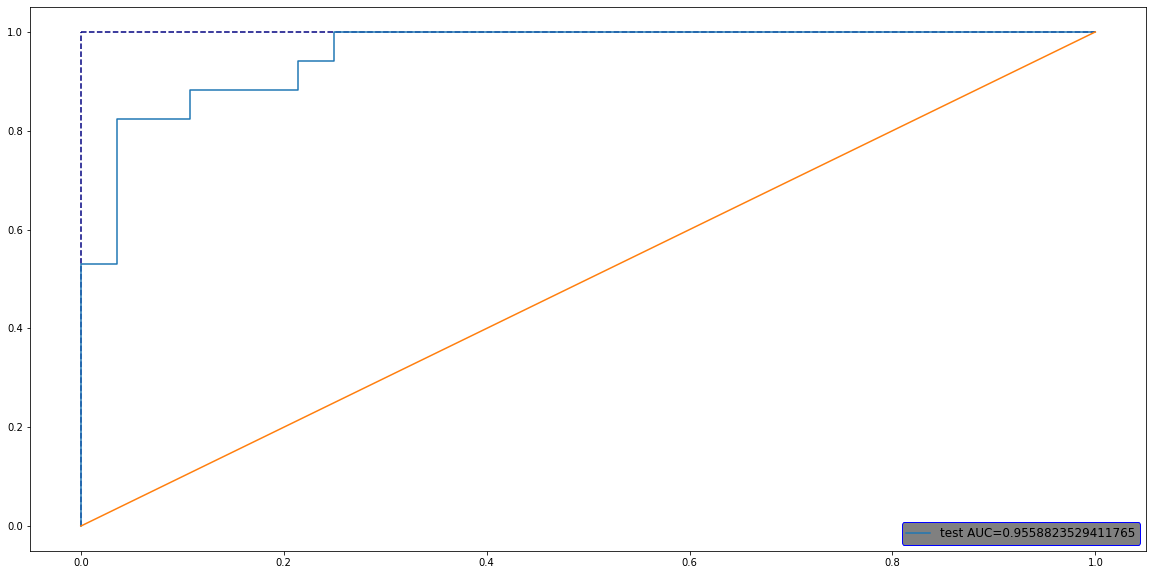

In [ ]:
draw_auc(simple_data[4],gbm_predict_proba[:,1])

In [ ]:
data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [ ]:
data_feature[0].insert(1, 'gbm', gbm_search.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)))
data_feature[0].insert(2, 'knn',  knn_grid_search.predict(np.concatenate([simple_data[1], simple_data[3]],axis=0)))


In [ ]:
data_feature[0].head()

,id,gbm,knn,age,dataset,trestbps,chol,thalch,oldpeak,num,...,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,1,0,0,63,Cleveland,145.0,233.0,150.0,2.3,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,1,67,Cleveland,160.0,286.0,108.0,1.5,1,...,0,1,0,0,1,0,0,0,0,1
2,3,1,1,67,Cleveland,120.0,229.0,129.0,2.6,1,...,0,1,0,0,0,1,0,0,1,0
3,4,0,0,37,Cleveland,130.0,250.0,187.0,3.5,0,...,1,0,0,0,1,0,1,0,0,0
4,5,1,0,41,Cleveland,130.0,204.0,172.0,1.4,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
def after_scaling(data):

  # Стандартизируем данные
  st = StandardScaler()
  X = st.fit_transform(data.drop(['num', 'id','dataset'], axis=1))
  X_train, X_test, y_train, y_test = train_test_split(X, data['num'], test_size=0.15, random_state=42)

  return ( data, X_train, y_train, X_test, y_test,)

In [ ]:
data_gbm_knn = after_scaling(data_feature[0])

In [ ]:
data_gbm_knn[0] 

,id,gbm,knn,age,dataset,trestbps,chol,thalch,oldpeak,num,...,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0
0,1,0,0,63,Cleveland,145.0,233.0,150.0,2.3,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1,1,67,Cleveland,160.0,286.0,108.0,1.5,1,...,0,1,0,0,1,0,0,0,0,1
2,3,1,1,67,Cleveland,120.0,229.0,129.0,2.6,1,...,0,1,0,0,0,1,0,0,1,0
3,4,0,0,37,Cleveland,130.0,250.0,187.0,3.5,0,...,1,0,0,0,1,0,1,0,0,0
4,5,1,0,41,Cleveland,130.0,204.0,172.0,1.4,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,0,0,68,Cleveland,144.0,193.0,141.0,3.4,1,...,0,1,0,0,0,1,0,0,1,0
300,301,0,0,57,Cleveland,130.0,131.0,115.0,1.2,1,...,0,1,0,0,0,1,0,1,0,0
301,302,1,1,57,Cleveland,130.0,236.0,174.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
508,509,1,1,47,Hungary,150.0,226.0,98.0,1.5,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
tree_search.fit(data_gbm_knn[1], data_gbm_knn[2])
tree_predict = tree_search.predict(data_gbm_knn[3])
tree_predict_proba = tree_search.predict_proba(data_gbm_knn[3])
print(accuracy_score(data_gbm_knn[4], tree_predict))

0.8666666666666667


In [ ]:
give_report(data_gbm_knn[4], tree_predict)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.79      0.88      0.83        17

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

[[24  4]
 [ 2 15]]


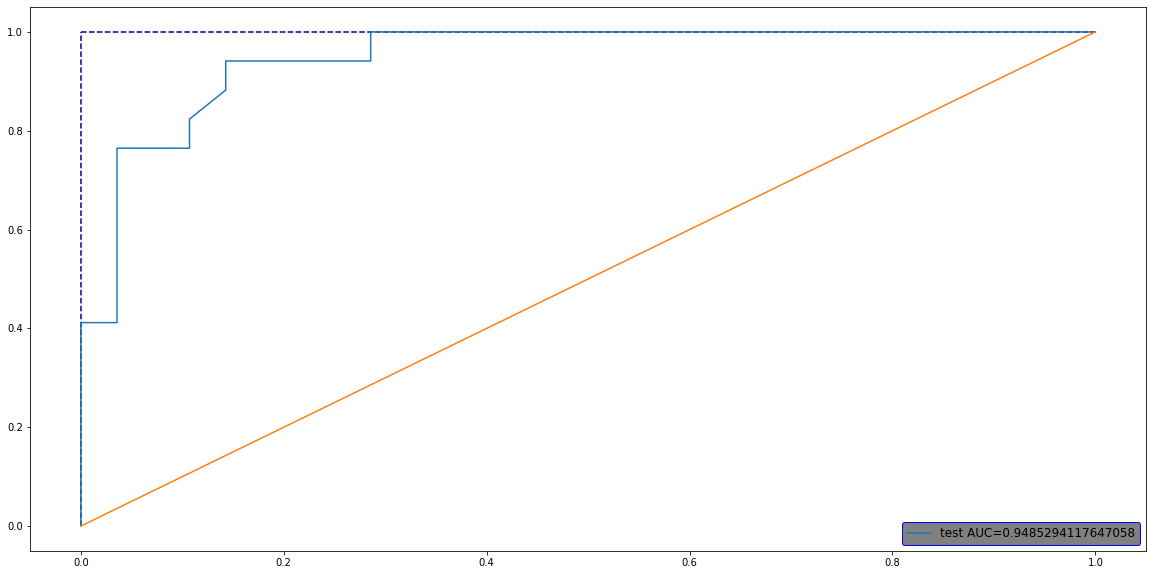

In [ ]:
draw_auc(data_gbm_knn[4], tree_predict_proba[:,1])

In [ ]:
dec_tree_search.fit(data_gbm_knn[1], data_gbm_knn[2])
dec_tree_predict = dec_tree_search.predict(data_gbm_knn[3])
dec_tree_predict_proba = dec_tree_search.predict_proba(data_gbm_knn[3])


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1805 fits failed out of a total of 34295.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1805 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; 

In [ ]:
give_report(data_gbm_knn[4], dec_tree_predict)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[26  2]
 [ 2 15]]


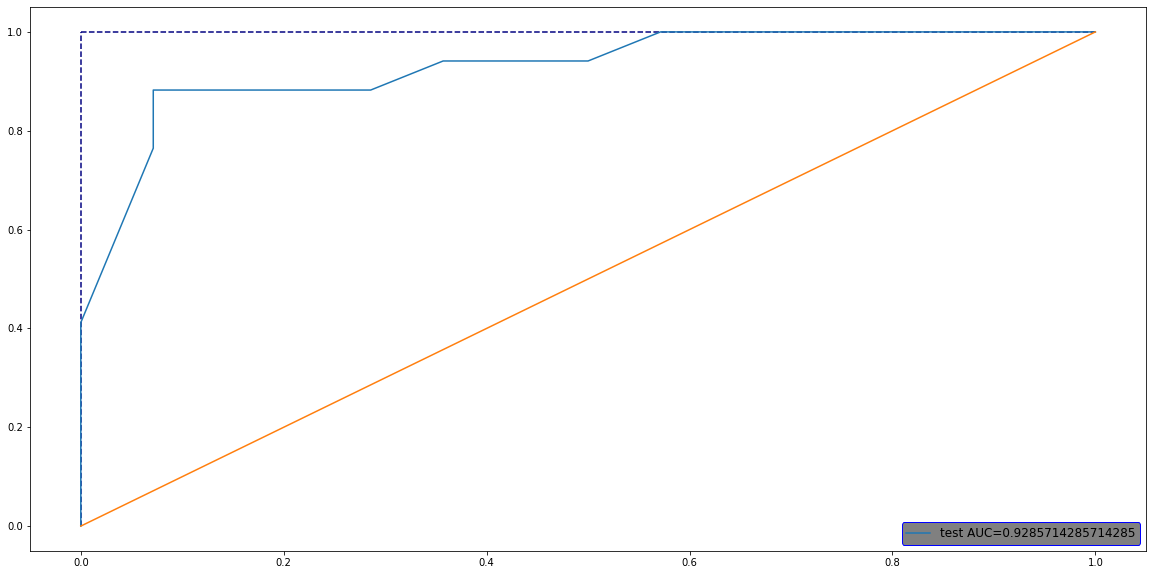

In [ ]:
draw_auc(data_gbm_knn[4], dec_tree_predict_proba[:,1])

In [ ]:
clf_log.fit(data_gbm_knn[1], data_gbm_knn[2])
log_predict = clf_log.predict(data_gbm_knn[3])
log_predict_proba = clf_log.predict_proba(data_gbm_knn[3])

In [ ]:
give_report(data_gbm_knn[4], log_predict)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


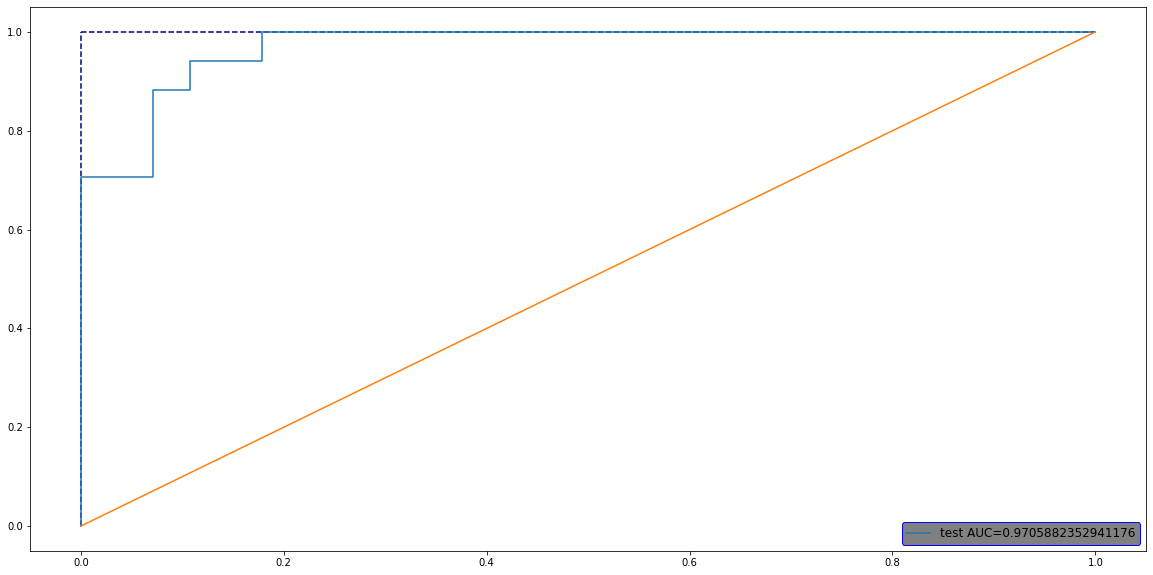

In [ ]:
draw_auc(data_gbm_knn[4], log_predict_proba[:,1])

Добавим признак равны произведению двух числовых

In [ ]:
data_with_age_and_mull.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data_with_age_and_mull['age'].replace([*range(0,31)], 1, inplace = True)
data_with_age_and_mull['age'].replace([*range(31,51)], 2, inplace = True)
data_with_age_and_mull['age'].replace([*range(51,100)], 3, inplace = True)

In [ ]:
data_with_age_and_mull.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,3,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,3,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,3,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,2,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,2,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data_age = scaling_and_transform(data_with_age_and_mull)

In [ ]:
clf_log.fit(data_age[1], data_age[2])
log_predict = clf_log.predict(data_age[3])
log_predict_proba = clf_log.predict_proba(data_age[3])



In [ ]:
give_report(data_age[4], log_predict)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


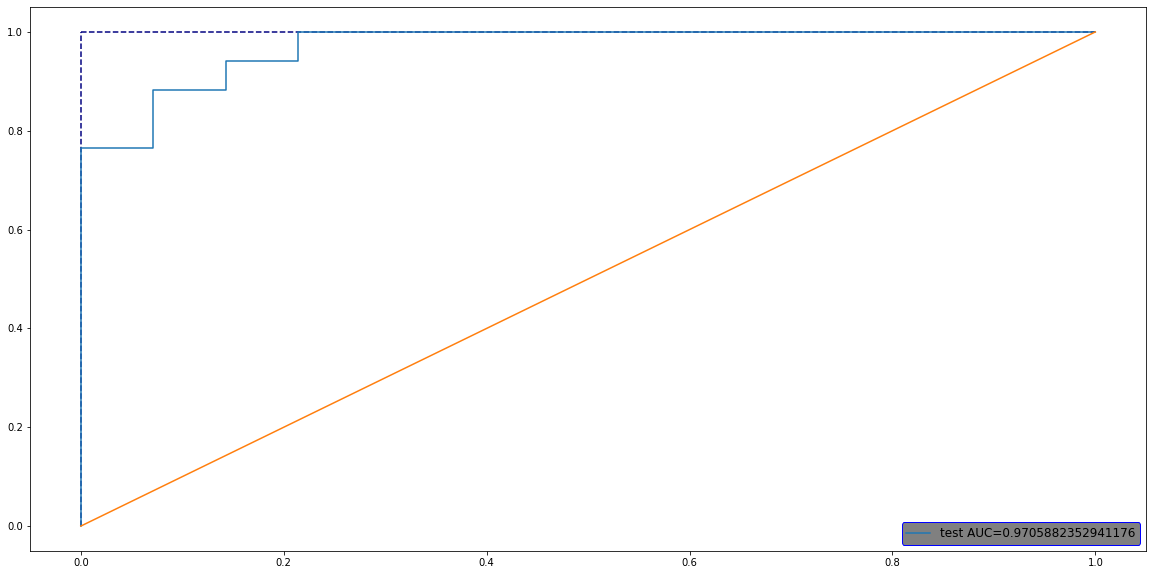

In [ ]:
draw_auc(data_age[4], log_predict_proba[:,1])

In [ ]:
tree_search.fit(data_age[1], data_age[2])
tree_predict = tree_search.predict(data_age[3])
tree_predict_proba = tree_search.predict_proba(data_age[3])

print(accuracy_score(data_age[4], tree_predict))

0.8444444444444444


In [ ]:
give_report(data_age[4], tree_predict)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.75      0.88      0.81        17

    accuracy                           0.84        45
   macro avg       0.83      0.85      0.84        45
weighted avg       0.86      0.84      0.85        45

[[23  5]
 [ 2 15]]


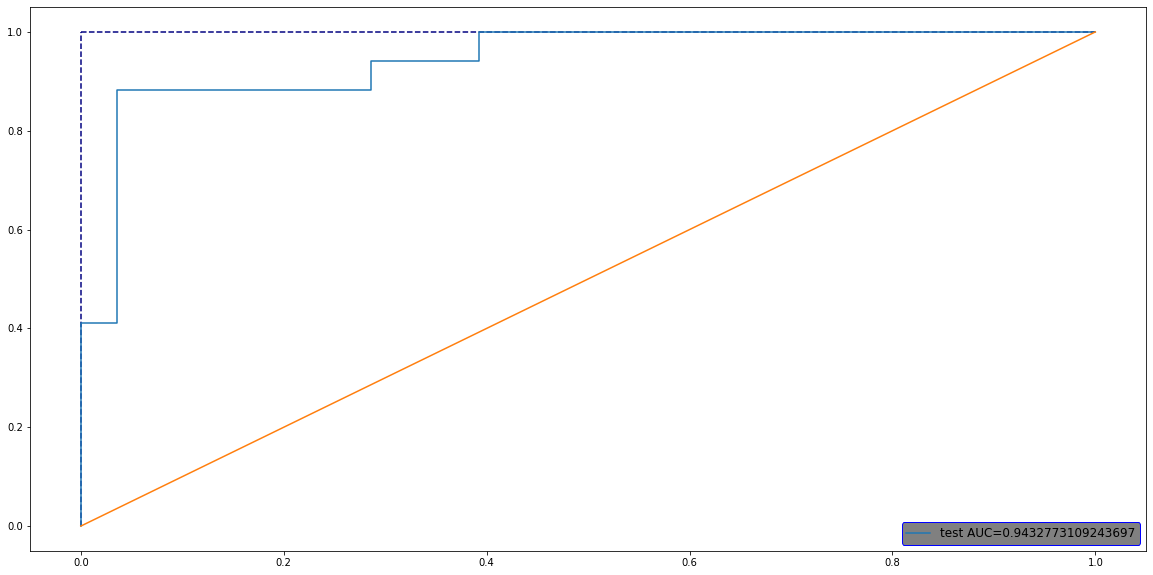

In [ ]:
draw_auc(data_age[4], tree_predict_proba[:,1])

Хуже(

In [ ]:
mull1 = data_mull[0]['trestbps']* data_mull[0]['chol']
mull2 = data_mull[0]['oldpeak']* data_mull[0]['thalch']

In [ ]:
data_mull[0].insert(1, 'mull1', mull1)
data_feature[0].insert(2, 'mull2',  mull2)

In [ ]:
data = after_scaling(data_mull[0])

In [ ]:
clf_log.fit(data[1], data[2])
clf_log_predict = clf_log.predict(data[3])
clf_log_predict_proba = clf_log.predict_proba(data[3])

In [ ]:
give_report(data[4], clf_log_predict)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

[[25  3]
 [ 2 15]]


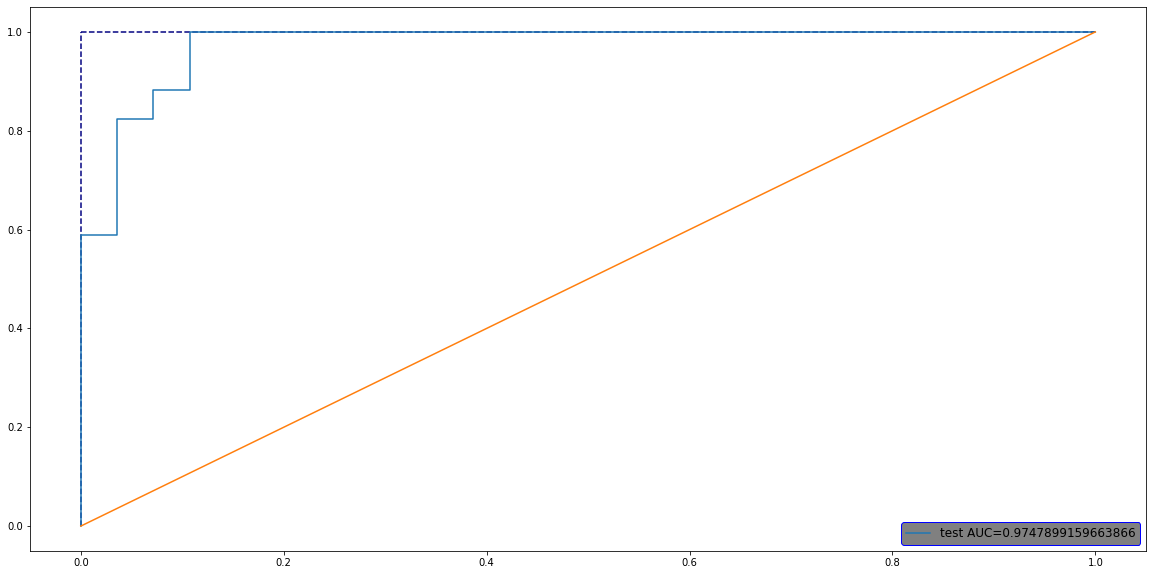

In [ ]:
draw_auc(data_age[4], clf_log_predict_proba[:,1])